In [1]:
import uproot
import uproot_methods
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
from IPython.display import Image, display

sns.set(
    context='notebook',
    style='darkgrid',
    palette='cool',
#     font='Times',
    font_scale=2,
    color_codes=False,
    rc=None,
)



***
### First we'll load the full collection of dataframes into a single dataframe


In [23]:
# Read MC
# df = pd.concat([
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ12/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ11/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ10/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ9/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ8/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ7/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ6/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ5/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ4/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ3/output.pkl'),
#     pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/JZ2/output.pkl'),
# ])
# df.to_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/output.pkl')
df = pd.read_pickle('/data/hnl/KShort/ntuples/dijet_mc16e/output.pkl')
sns.set_palette('cool')

In [24]:
# Read data
# df_data = pd.concat([pd.read_pickle(path) for path in glob.glob('/data/hnl/KShort/ntuples/data18_selected/*.pkl')])
df_data = pd.read_pickle('/data/hnl/KShort/ntuples/data_output.pkl')
# df_data.to_pickle('/data/hnl/KShort/ntuples/data_output.pkl')
# df = df_data
sns.set_palette('hot')

***
### Apply a mass selection at the kshort mass

In [25]:
dmmass = 0.010
# dmmass = 0.015
df = df.query(f'secVtx_VSI_LRTR3_1p0_mass < .4977 + {dmmass} & \
                secVtx_VSI_LRTR3_1p0_mass > .4977 - {dmmass} ')


In [26]:
df_data = df_data.query(f'secVtx_VSI_LRTR3_1p0_mass < .4977 + {dmmass} & \
                          secVtx_VSI_LRTR3_1p0_mass > .4977 - {dmmass} ')

In [27]:
hist_options = {
    'histtype': 'step',
    'linewidth': 6,
    'density': False,
#     'bins': np.linspace(0,100,50),
#     'log': False,
}

***
### It appears that most of these vertices are formed from two standard tracks

In [10]:
sns.set_palette('hot')
plt.figure(figsize=[10,6])
plt.hist(df.secVtx_VSI_LRTR3_1p0_ntrk_lrt, bins=np.arange(4))
plt.xticks(np.arange(4))
plt.xlabel("number of LRT tracks")
plt.ylabel("Vertices")
plt.legend(["KShort selection"])

print(end='');
plt.show()


***
### Let's look at the distribution in DVr and pt

In [11]:

dvr_bins = [0, 24, 44, 64, 84, 104, 124, 144, 164, 184, 204, 224, 244, 264, 284, 300]

plt.figure(figsize=[15,8])

h = plt.hist(df.secVtx_VSI_LRTR3_1p0_r, bins=dvr_bins, label='data MC VSI_mod', alpha=0.4)
entries, edges = h[0], h[1]
print(entries)
yerr = np.sqrt(entries)
# plt.errorbar(edges, y, xerr=0.2, yerr=0.4)

sns.set_palette('cool') # if using df (mc)
# sns.set_palette('hot') # if using df_data (data)
plt.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 0')['secVtx_VSI_LRTR3_1p0_r'], bins=dvr_bins, label='2 standard tracks', **hist_options)
plt.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 1')['secVtx_VSI_LRTR3_1p0_r'], bins=dvr_bins, label='1 LRT 1 standard', **hist_options)
plt.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 2')['secVtx_VSI_LRTR3_1p0_r'], bins=dvr_bins, label='2 LRT tracks', **hist_options)

# plt.grid(which='both')
plt.xticks(dvr_bins, rotation=45)
plt.xlabel("displaced vertex radius [mm]")
plt.ylabel("Vertices")
plt.legend(fontsize=20)

print(end='');

[245714. 455773. 354611. 299282. 127258.  74346.  29388.  24800.  22789.
  19963.  17579.  16216.  15308.  13450.   7076.]


### That's actually a little surprising. Relatively few of the displaced vertices are produced by large radius tracks. Even at high DV radius, the vertices seem to be mostly dominated by standard tracks.

### Let's look at the same plot but separated by bins of pt

In [16]:
# pt_bins = [2, 2.5, 3, 4, 6, 8, 10, np.inf] # old paper bins. too low.
# pt_bins = [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, np.inf] # What we want, but not really enough stats.
pt_bins = [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, np.inf] # Good compromise.
bin_pairs = list(zip(pt_bins, pt_bins[1:] + pt_bins[:1]))[:-1]

## MC

In [13]:
fig, axs = plt.subplots(len(pt_bins)-1,1, figsize=[15, (len(pt_bins)-1)*7])

fig.set_label("ok")


for ax, pt_slice in zip(axs.reshape(-1), bin_pairs): 
    pt_query = f'secVtx_VSI_LRTR3_1p0_pt > {pt_slice[0]} & secVtx_VSI_LRTR3_1p0_pt < {pt_slice[1]}'
    print(pt_query)
    ax.hist(df.query(pt_query)['secVtx_VSI_LRTR3_1p0_r'], 
            bins=dvr_bins, label='dijet MC VSI_mod', alpha=0.4)
    ax.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 0')
              .query(pt_query)
              ['secVtx_VSI_LRTR3_1p0_r'], 
              bins=dvr_bins, label='2 standard tracks', **hist_options)
    ax.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 1')
              .query(pt_query)
              ['secVtx_VSI_LRTR3_1p0_r'], 
              bins=dvr_bins, label='1 LRT 1 standard', **hist_options)
    ax.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 2')
              .query(pt_query)
              ['secVtx_VSI_LRTR3_1p0_r'], 
              bins=dvr_bins, label='2 LRT tracks', **hist_options)

    # plt.grid(which='both')
#     ax.set_xticklabels(dvr_bins, rotation=45, size=15)
    ax.set_yticklabels(['{:.0f}'.format(a) for a in ax.get_yticks()], size=15)
    ax.set_title(f'pt: {pt_slice}')

# fig.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], fontsize=20)
print()
# Set common labels
fig.text(0.5, 0.084, 'displaced vertex radius [mm]', ha='center', va='center')
fig.text(0.06, 0.5, 'Vertices', ha='center', va='center', rotation='vertical')

print(end='');

secVtx_VSI_LRTR3_1p0_pt > 2 & secVtx_VSI_LRTR3_1p0_pt < 4


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 4 & secVtx_VSI_LRTR3_1p0_pt < 6


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 6 & secVtx_VSI_LRTR3_1p0_pt < 8


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 8 & secVtx_VSI_LRTR3_1p0_pt < 10


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 10 & secVtx_VSI_LRTR3_1p0_pt < 15


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 15 & secVtx_VSI_LRTR3_1p0_pt < 20


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 20 & secVtx_VSI_LRTR3_1p0_pt < 25


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 25 & secVtx_VSI_LRTR3_1p0_pt < 30


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 30 & secVtx_VSI_LRTR3_1p0_pt < 35


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 35 & secVtx_VSI_LRTR3_1p0_pt < 40


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 40 & secVtx_VSI_LRTR3_1p0_pt < 45


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 45 & secVtx_VSI_LRTR3_1p0_pt < 50


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 50 & secVtx_VSI_LRTR3_1p0_pt < inf


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


## Data

In [17]:
sns.set(
    context='notebook',
    style='darkgrid',
    palette='hot',
#     font='Times',
    font_scale=2,
    color_codes=False,
    rc=None,
)

fig, axs = plt.subplots(len(pt_bins)-1,1, figsize=[15, (len(pt_bins)-1)*7])

fig.set_label("ok")
df_data_frac = df_data.sample(frac=0.01)

for ax, pt_slice in zip(axs.reshape(-1), bin_pairs): 
    pt_query = f'secVtx_VSI_LRTR3_1p0_pt > {pt_slice[0]} & secVtx_VSI_LRTR3_1p0_pt < {pt_slice[1]}'
    print(pt_query)
    ax.hist(df_data_frac.query(pt_query)['secVtx_VSI_LRTR3_1p0_r'], 
            bins=dvr_bins, label='dijet MC VSI_mod', alpha=0.4)
    ax.hist(df_data_frac.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 0')
              .query(pt_query)
              ['secVtx_VSI_LRTR3_1p0_r'], 
              bins=dvr_bins, label='2 standard tracks', **hist_options)
    ax.hist(df_data_frac.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 1')
              .query(pt_query)
              ['secVtx_VSI_LRTR3_1p0_r'], 
              bins=dvr_bins, label='1 LRT 1 standard', **hist_options)
    ax.hist(df_data_frac.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 2')
              .query(pt_query)
              ['secVtx_VSI_LRTR3_1p0_r'], 
              bins=dvr_bins, label='2 LRT tracks', **hist_options)

    # plt.grid(which='both')
#     ax.set_xticklabels(dvr_bins, rotation=45, size=15)
    ax.set_yticklabels(['{:.0f}'.format(a) for a in ax.get_yticks()], size=15)
    ax.set_title(f'pt: {pt_slice}')

# fig.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], fontsize=20)
print()
# Set common labels
fig.text(0.5, 0.084, 'displaced vertex radius [mm]', ha='center', va='center')
fig.text(0.06, 0.5, 'Vertices', ha='center', va='center', rotation='vertical')

print(end='');

secVtx_VSI_LRTR3_1p0_pt > 2 & secVtx_VSI_LRTR3_1p0_pt < 4


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 4 & secVtx_VSI_LRTR3_1p0_pt < 6


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 6 & secVtx_VSI_LRTR3_1p0_pt < 8


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 8 & secVtx_VSI_LRTR3_1p0_pt < 10


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 10 & secVtx_VSI_LRTR3_1p0_pt < 15


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 15 & secVtx_VSI_LRTR3_1p0_pt < 20


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 20 & secVtx_VSI_LRTR3_1p0_pt < 25


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 25 & secVtx_VSI_LRTR3_1p0_pt < 30


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 30 & secVtx_VSI_LRTR3_1p0_pt < 35


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


secVtx_VSI_LRTR3_1p0_pt > 35 & secVtx_VSI_LRTR3_1p0_pt < inf


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


***
Now I'm going to try putting the histograms in root to make division a little easier

processing 2_4


/data/hnl/KShort/plots/vertex_comparison_2_4.png
processing 4_6


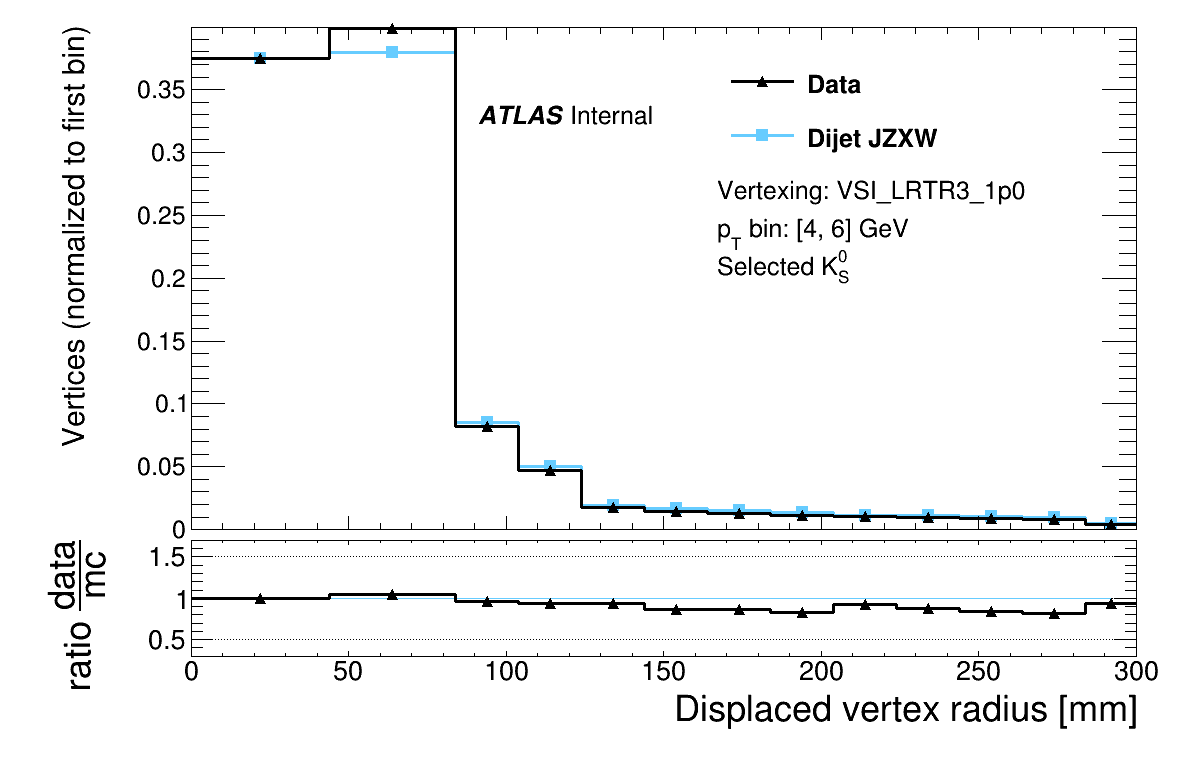

/data/hnl/KShort/plots/vertex_comparison_4_6.png
processing 6_8


/data/hnl/KShort/plots/vertex_comparison_6_8.png
processing 8_10


/data/hnl/KShort/plots/vertex_comparison_8_10.png
processing 10_15


/data/hnl/KShort/plots/vertex_comparison_10_15.png
processing 15_20


/data/hnl/KShort/plots/vertex_comparison_15_20.png
processing 20_25


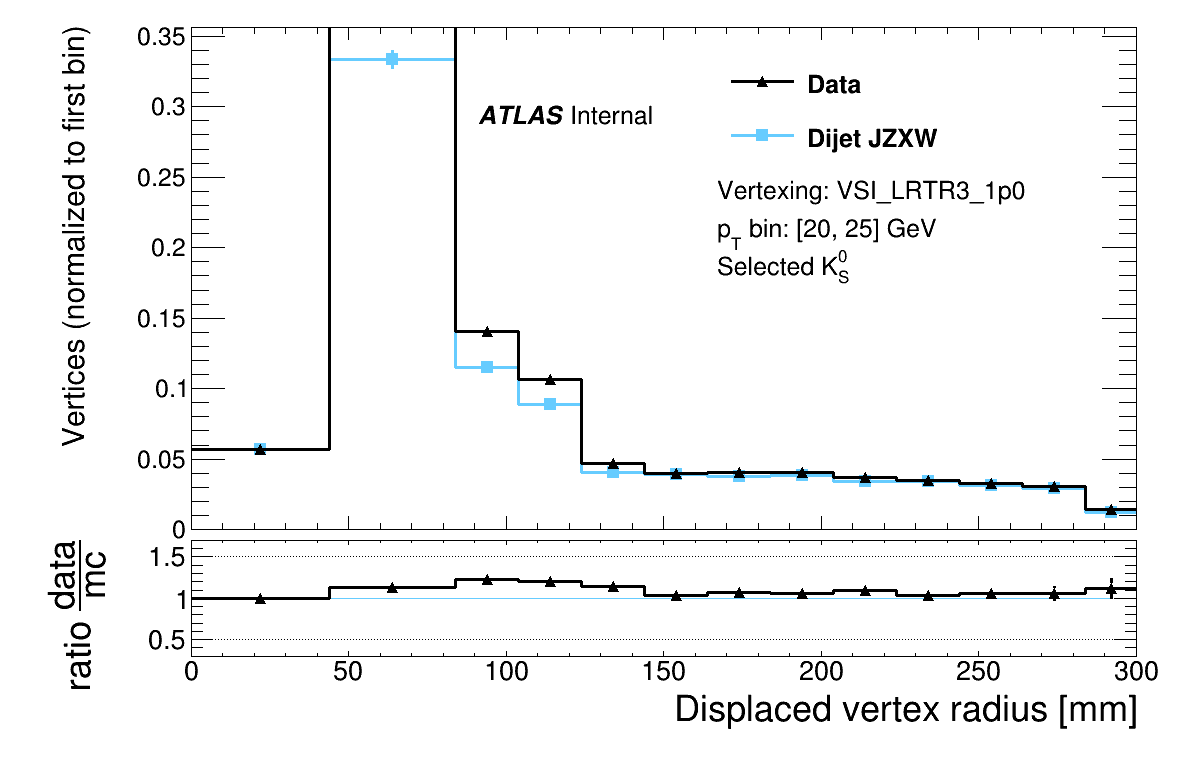

/data/hnl/KShort/plots/vertex_comparison_20_25.png
processing 25_30


/data/hnl/KShort/plots/vertex_comparison_25_30.png
processing 30_35


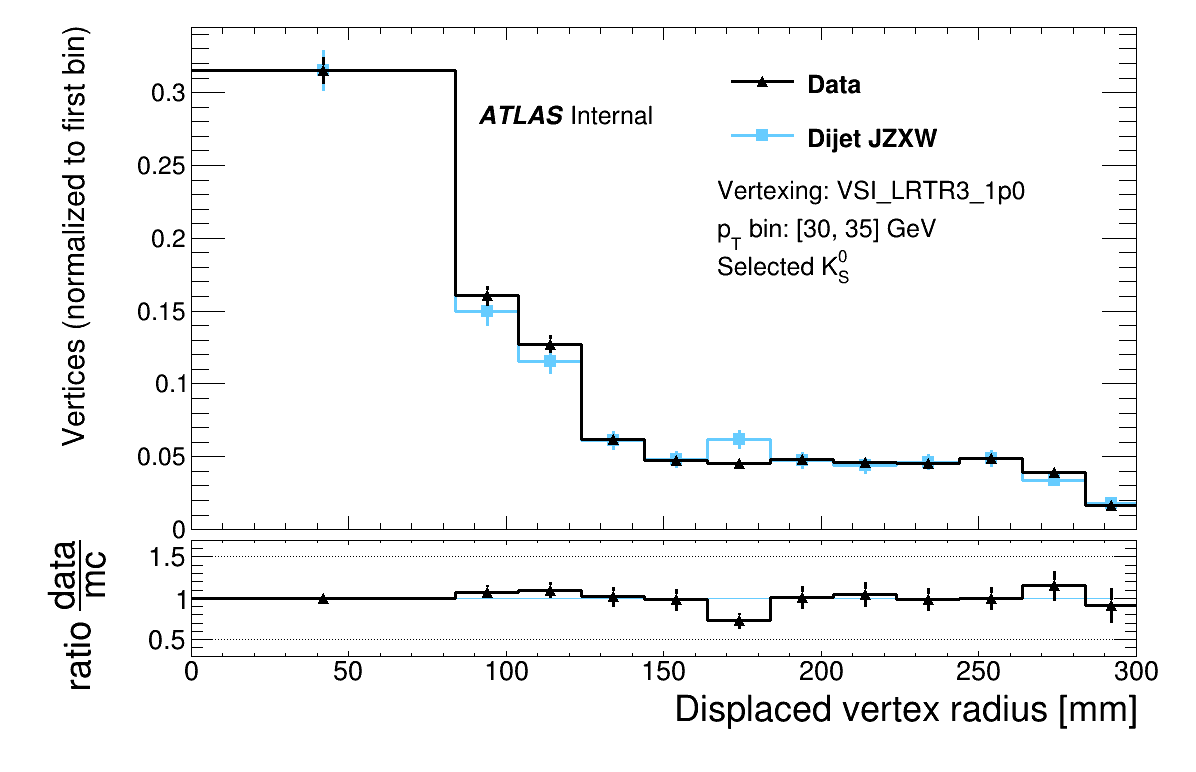

/data/hnl/KShort/plots/vertex_comparison_30_35.png
processing 35_inf


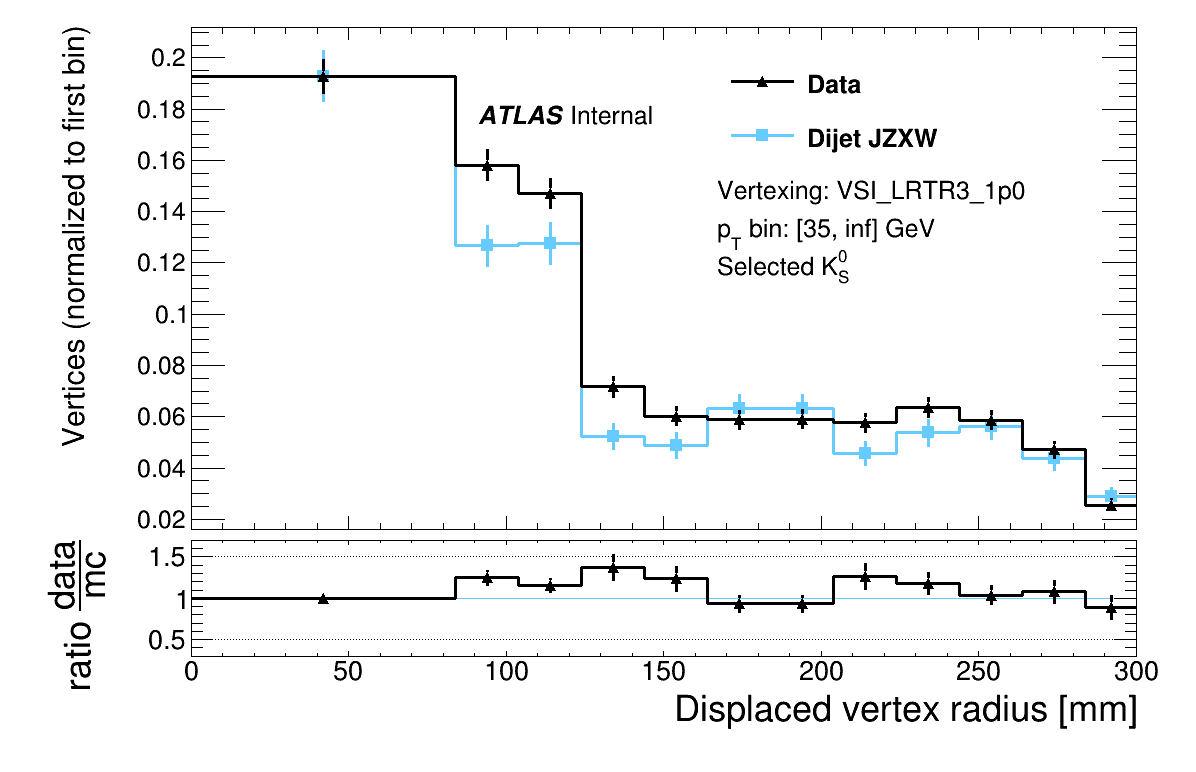

/data/hnl/KShort/plots/vertex_comparison_35_inf.png


Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_2_4.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_4_6.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_6_8.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_8_10.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_10_15.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_15_20.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_20_25.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_25_30.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_30_35.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_35_i

In [28]:
import ROOT
from array import array
ROOT.gROOT.SetStyle('ATLAS')
import time
import matplotlib.pyplot as plt
import itertools

FONT_SIZE = 0.05
def draw_note(x, y, text, size=.05, font=42):
    l = ROOT.TLatex()
    l.SetTextColor(1)
    l.SetTextFont(font)
    l.SetTextSize(size)
    l.SetNDC()
    l.DrawLatex(x, y, text)

def atlas_label(x, y, text=None, color=1):
    draw_note(x, y, r"#bf{#it{ATLAS}} " + text)

def divide0(n, d):
    return n / d if d else 0

def get_markers():
    return itertools.cycle([22,21,33,29,30,31,32,34,35])

def get_colors():
    return itertools.cycle([ROOT.kBlack, 
                            ROOT.kAzure+6, 
                            ROOT.kViolet+8, 
                            ROOT.kRed, 
                            ROOT.kGreen+1, 
                            ROOT.kOrange -3])


def make_root_hist(pt_bin, pt_idx):
    hist_colors = get_colors()
    hist_markers = get_markers()
    
    bin_string = "{}_{}".format(pt_bin[0], pt_bin[1]).replace('.', 'p')
    print('processing', bin_string)
    pt_query = f'secVtx_VSI_LRTR3_1p0_pt >= {pt_bin[0]} & secVtx_VSI_LRTR3_1p0_pt < {pt_bin[1]}'
    entries_data, edges_data = np.histogram(
#                                         df
                                        df_data
                                        .query(pt_query)
                                        .secVtx_VSI_LRTR3_1p0_r, bins=dvr_bins)
    entries_mc, edges_mc = np.histogram(
                                        df
                                        .query(pt_query)
                                        .secVtx_VSI_LRTR3_1p0_r, bins=dvr_bins)

    
    
#     bin_string = 'all'
    # Prepare canvas
    c = None
    c = ROOT.TCanvas("c", "", int(1200), int(800))

    # Upper plot will be in pad1
    pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0.02);  # Upper and lower plot are not joined
    # pad1.SetGridx();           # Vertical grid
    pad1.Draw()                  # Draw the upper pad: pad1
 
    # lower plot will be in pad 2
    pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0)
    pad2.SetBottomMargin(0.4)
    # pad2.SetGridx() # vertical grid
    pad2.SetGridy() # horizontal grid
    pad2.Draw('goff')

    #########################
    # Main plot
    #########################
    pad1.cd() # pad1 becomes the current pad
    
    
    # Define histograms
    rdv = {'data': ROOT.TH1D('rdv_data'+bin_string,'Displaced Vertex Radius', len(dvr_bins)-1, array('d', dvr_bins)),
           'mc': ROOT.TH1D('rdv_mc'+bin_string,'Displaced Vertex Radius', len(dvr_bins)-1, array('d', dvr_bins))}

    for i, (val, edge) in enumerate(zip(entries_data, edges_data)):
        rdv['data'].SetBinContent(i+1,val)
    
    for i, (val, edge) in enumerate(zip(entries_mc, edges_mc)):
        rdv['mc'].SetBinContent(i+1,val)
                
    # Set draw properties
    for h in rdv.values():
        # Histogram properties
        h.SetMarkerSize(1.5)
        h.SetLineWidth(int(3))
        hcolor = next(hist_colors)
        h.SetLineColor(hcolor)
        h.SetMarkerColor(hcolor)
        hmarker = next(hist_markers)
        h.SetMarkerStyle(hmarker)
        # X axis
        x_ax = h.GetXaxis()
        x_ax.SetTitle("Displaced vertex radius [mm]")
        x_ax.SetLabelSize(0)
        x_ax.SetTitle('DV_r')
        # Y axis
        y_ax = h.GetYaxis()
        y_ax.SetTitle("Vertices (normalized to first bin)")
        y_ax.SetMaxDigits(6);
        y_ax.SetTitleOffset(1.0)
        y_ax.SetRangeUser(0,1);
        y_ax.SetLabelFont(42)
        y_ax.SetLabelSize(FONT_SIZE);   
        y_ax.SetTitleFont(42)
        y_ax.SetTitleSize(FONT_SIZE*1.2)

    for h in rdv.values():
        # Normalize the histograms to unity
        scale = divide0(1, h.Integral())
        h.Scale(scale)
        
        
        
    # Normalize to the first bin
    # We do this assuming that the vertices closest to the interaction point 
    # are most reliable between data and MC
    first_bin_ratio = divide0( # safe divide
        rdv['data'].GetBinContent(1), # bin 0 is underflow
        rdv['mc'].GetBinContent(1)) 
    rdv['mc'].Scale(first_bin_ratio)

    # Draw the histograms
    rdv['mc'].Draw('E0 HIST SAME')
    rdv['data'].Draw('E0 HIST SAME')
    
    
        
    # format legend
    x = 0.6
    y = 0.7
    dy = .07
    leg = ROOT.TLegend(x, y, x+.3, y+0.2)
    leg.SetTextSize(0.05)
    leg.SetBorderSize(0)
    leg.SetFillColor(ROOT.kWhite)
    leg.SetShadowColor(ROOT.kWhite)
    leg.AddEntry(rdv['data'], 'Data', "lp")
    leg.AddEntry(rdv['mc'], 'Dijet JZXW', "lp")
    leg.Draw("SAME")
    draw_note(x, y-dy, f'Vertexing: {vtx_alg_string}')
    draw_note(x, y-2*dy, f'p_{{T}} bin: [{pt_bin[0]}, {pt_bin[1]}] GeV')
    draw_note(x, y-3*dy, 'Selected K_{S}^{0}')
    atlas_label(x-.2,y+dy, 'Internal')
    

    #########################
    # Ratio plot
    #########################
    pad2.cd() # pad2 becomes the current pad
    
    hist_markers = get_markers()
    hist_colors = get_colors()
    hmarker = next(hist_markers)
    hcolor = next(hist_colors)
    # Define the ratio plot
    h3 = rdv['data'].Clone('h3');
    h3.SetLineColor(hcolor);
    h3.SetMarkerSize(1.5)
    h3.SetLineWidth(int(3))
    h3.SetMarkerColor(hcolor)
    h3.SetMarkerStyle(hmarker);
    h3.SetMinimum(0.3);  # Define Y ..
    h3.SetMaximum(1.7); # .. range
    # h3.Sumw2();
    # h3.SetStats(0);      # No statistics on lower plot
    h3.Divide(rdv['mc']); # This takes in to account uncertainties in both MC and data histogrmas
    # TODO could make a clone of the MC histogram with 0 uncertainties (setbinerror 0)
    max_bin_content = h3.GetBinContent(h3.GetMaximumBin())
    min_bin_content = h3.GetBinContent(h3.GetMinimumBin())
    # h3.SetMaximum(1.4 if max_bin_content > 1.3 else max_bin_content + .1);
    # h3.SetMinimum(min_bin_content - .1);
    hline = ROOT.TLine(h3.GetBinCenter(h3.FindFirstBinAbove()), 1, h3.GetBinCenter(h3.FindLastBinAbove()), 1)
    hline.SetLineColor(next(hist_colors))
    pad2.SetFillStyle(0)
    h3.Draw() # Draw the axes 
    hline.Draw("same")
    h3.Draw("hist same") # Draw the ratio plot 
    h3.Draw("e same") # Draw the ratio plot errors

    # Y axis ratio plot settings
    h3.GetYaxis().SetTitle("ratio #frac{data}{mc}")
    h3.GetYaxis().SetNdivisions(505)
    h3.GetYaxis().SetTitleSize(FONT_SIZE*4)
    h3.GetYaxis().SetTitleFont(42)
    h3.GetYaxis().SetTitleOffset(0.3)
    h3.GetYaxis().SetLabelFont(42) 
    h3.GetYaxis().SetLabelSize(FONT_SIZE*3)
    # X axis ratio plot settings
    h3.GetXaxis().SetTitle("Displaced vertex radius [mm]")
    h3.GetXaxis().SetTitleSize(FONT_SIZE*4);
    h3.GetXaxis().SetTitleFont(42);
    h3.GetXaxis().SetTitleOffset(0.9);
    h3.GetXaxis().SetLabelFont(42); 
    h3.GetXaxis().SetLabelSize(FONT_SIZE*3);  


    c.Draw()
    c.SaveAs(f'{output_dir}vertex_comparison_{bin_string}.png')    
    display(Image(f'{output_dir}vertex_comparison_{bin_string}.png'))
    print(f'{output_dir}vertex_comparison_{bin_string}.png')

    
    # fill 2d plot
    dv_r_2d_bins = []
    for r_idx in range(1, h3.GetNbinsX()+1):
        dv_r_2d_bins.append(h3.GetBinContent(r_idx)) 
        # h2d.SetBinContent(r_idx, pt_idx, h3.GetBinContent(r_idx))
    dv_r_pt_2d_bins.append(dv_r_2d_bins)

# set up 2d plot
pt_bins = [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, np.inf] # Good compromise.

dvr_bins = [0, 24, 44, 64, 84, 104, 124, 144, 164, 184, 204, 224, 244, 264, 284, 300]
dvr_bins = [0,         64, 84, 104, 124, 144, 164, 184, 204, 224, 244, 264, 284, 300]
dvr_bins_lowpt  = [0,         44, 84, 104, 124, 144, 164, 184, 204, 224, 244, 264, 284, 300]
dvr_bins_highpt = [0,             84, 104, 124, 144, 164, 184, 204, 224, 244, 264, 284, 300]

vtx_alg_string = 'VSI_LRTR3_1p0'
output_dir = "/data/hnl/KShort/plots/"


# Set up 2d plot
dv_r_pt_2d_bins = []


for i, pt_bin in enumerate(zip(pt_bins, pt_bins[1:]), start=1):
    if pt_bin[1] > 25:
        dvr_bins = dvr_bins_highpt
    else:
        dvr_bins = dvr_bins_lowpt

    make_root_hist(pt_bin, i)



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Info in <TCanvas::Print>: png file /data/hnl/KShort/plots/vertex_comparison_2D.png has been created


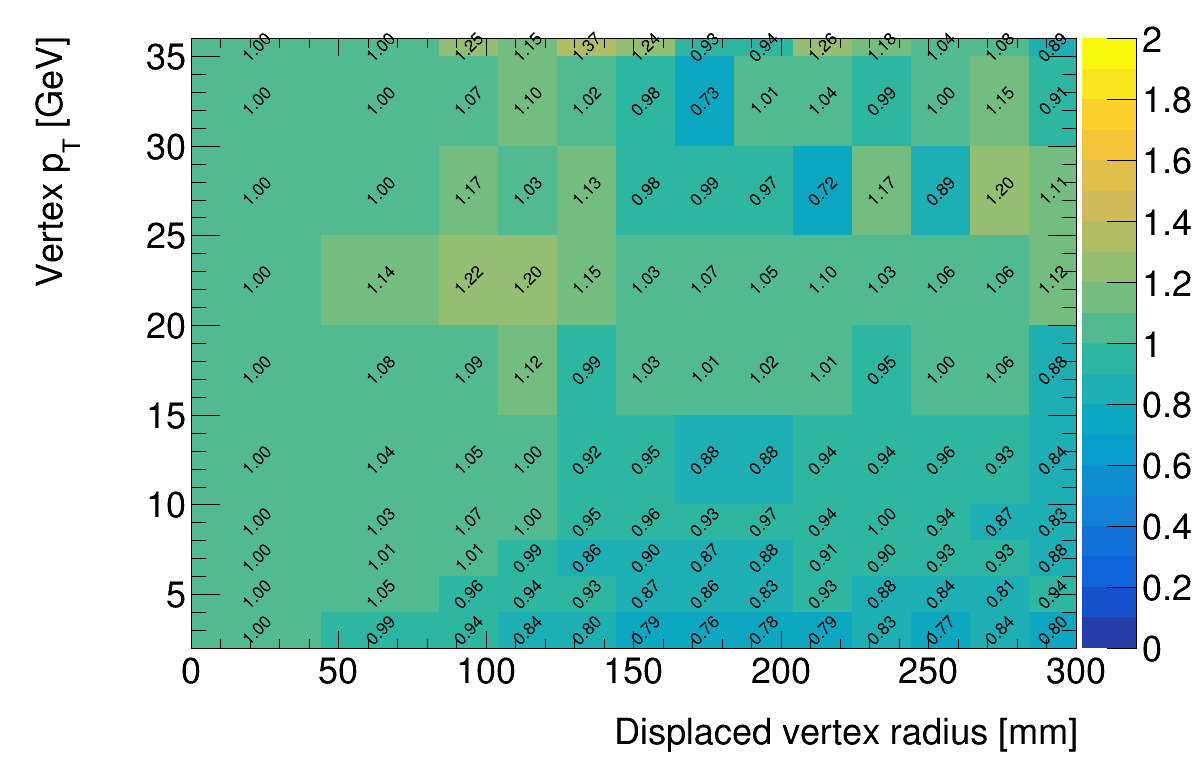

In [29]:

c2 = ROOT.TCanvas("c2", "2D plot", int(1200), int(800))
c2.SetRightMargin(0.1)
h2d = ROOT.TH2D("h2","2D plot",
               len(dvr_bins_lowpt)-1,   # nbinsx
               array('d', dvr_bins_lowpt),  # xbins
               len(pt_bins)-1,   # nbinsy
               array('d', pt_bins[0:-1]+[pt_bins[-2]+1])  # ybins
               )
h2d.GetXaxis().SetTitle(f"Displaced vertex radius [mm]")
h2d.GetYaxis().SetTitle(f"Vertex p_{{T}} [GeV]")


dv_r_pt_2d_bins_copy = []

for dv_pt_bin in dv_r_pt_2d_bins:
    # set first two bins for high-pt regions
    if len(dv_pt_bin)+1 == len(dvr_bins_highpt):
        dv_pt_bin = [dv_pt_bin[0]]+dv_pt_bin
    dv_r_pt_2d_bins_copy.append(dv_pt_bin)

for y, dv_pt_bin in enumerate(dv_r_pt_2d_bins_copy, start=1):
    for x, dv_r_bin in enumerate(dv_pt_bin, start=1):
#         print(x, y, dv_r_bin)
        h2d.SetBinContent(x, y, dv_r_bin)

# Draw 2d plot
h2d.SetMaximum(2)
h2d.SetMinimum(0)
h2d.Draw("colz SAME TEXT45")
ROOT.gStyle.SetPaintTextFormat("4.2f");



c2.Draw()
c2.SaveAs(f'{output_dir}vertex_comparison_2D.png')


outfile = ROOT.TFile(f'/home/newhouse/public/Analysis/HNL/VertexingEfficiency/2dhist.root', 'RECREATE')
h2d.Write()
outfile.Close()


[  20.   81.  183.  286.  391.  396.  465.  483.  628.  623.  754.  737.
  849.  739.  815.  828.  741. 1008. 1622. 1953. 2159. 2238. 2493. 2185.
 1983. 2028. 2409. 2515. 2582. 2471. 2319. 1835. 1174.  773.  782.  860.
  827.  786.  773.  684.  577.  572.  581.  466.  331.  365.  327.  187.
  106.   29.]


/home/newhouse/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newhouse/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


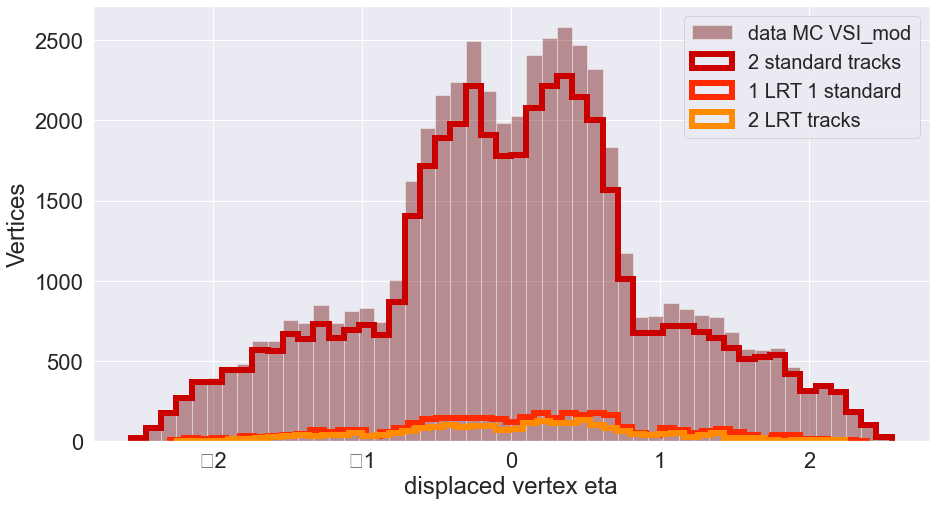

In [113]:

dvr_bins = [0, 24, 44, 64, 84, 104, 124, 144, 164, 184, 204, 224, 244, 264, 284, 300]

plt.figure(figsize=[15,8])

h = plt.hist(df.secVtx_VSI_LRTR3_1p0_eta, bins=50, label='data MC VSI_mod', alpha=0.4)
entries, edges = h[0], h[1]
print(entries)

plt.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 0')['secVtx_VSI_LRTR3_1p0_eta'], bins=50, label='2 standard tracks', **hist_options)
plt.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 1')['secVtx_VSI_LRTR3_1p0_eta'], bins=50, label='1 LRT 1 standard', **hist_options)
plt.hist(df.query('secVtx_VSI_LRTR3_1p0_ntrk_lrt == 2')['secVtx_VSI_LRTR3_1p0_eta'], bins=50, label='2 LRT tracks', **hist_options)

# plt.grid(which='both')
# plt.xticks(dvr_bins, rotation=45)
plt.xlabel("displaced vertex eta")
plt.ylabel("Vertices")
plt.legend(fontsize=20)

print(end='');

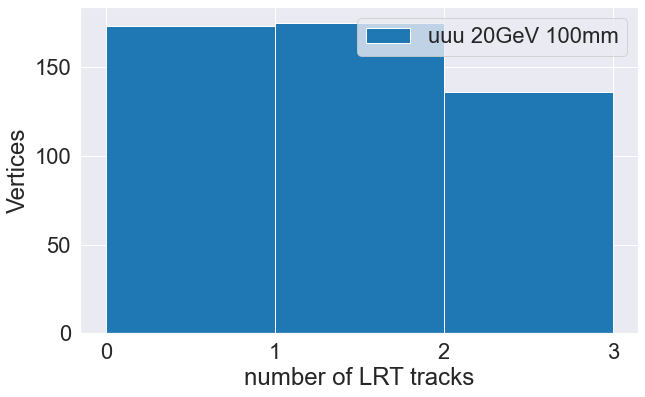

In [563]:
test = load_df('/data/hnl/forRobin/VSILepMod_20G_100mm/histograms_mc16e_20G_100mm_uuu.root', 'VSI_LeptonsMod_LRTR3_1p0_ntuples_DVtype','uuu 20GeV 100mm')
sns.set_palette('tab10')
# .hist(bins=[0,1,2,3])

plt.figure(figsize=[10,6])
plt.hist(test.DV_ntrk_lrt, bins=np.arange(4))
plt.xticks(np.arange(4))
plt.xlabel("number of LRT tracks")
plt.ylabel("Vertices")
plt.legend(['uuu 20GeV 100mm'])

print(end='');
plt.show()



/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1080x720 with 0 Axes>

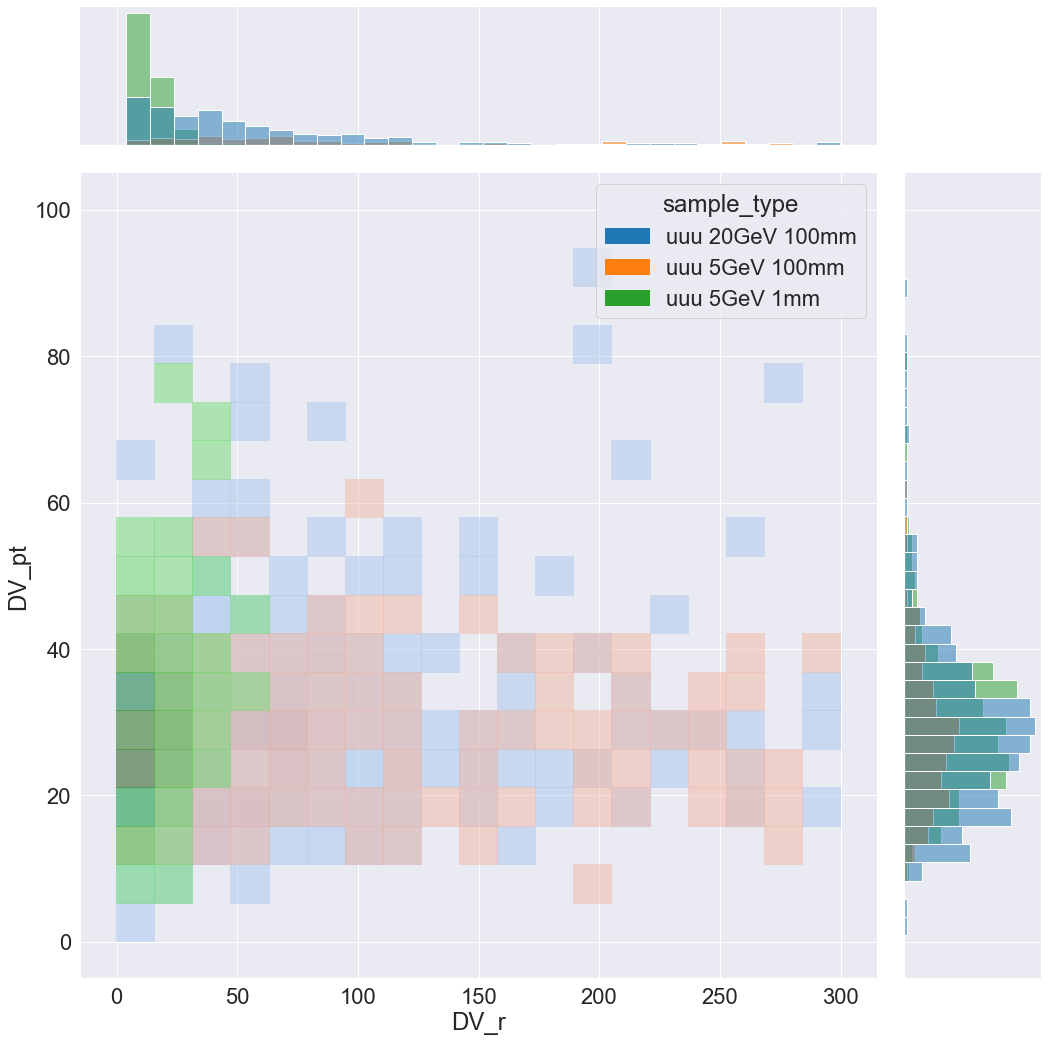

In [507]:

def load_df(filename, treename, sample_type):
    # open signal files
    VSI_LeptonsMod_LRTR3_1p0_ntuples_LNC_DVtype = uproot.open(filename)[treename]

    # combine the LNC and LNV channels that were split. We want the full sample.
    df = VSI_LeptonsMod_LRTR3_1p0_ntuples_LNC_DVtype.pandas.df()
    
    # apply final selections
    df = df.query('DV_2medium > 0 & DV_mass > 2.0 & mvis > 50.0 & mvis < 84.0')
    
    df['sample_type'] = sample_type
    
    return df

df_all = pd.DataFrame()

# df_all = df_all.append(load_df('/data/hnl/forRobin/VSILepMod_uuu_10G_10mm/histograms_mc16e_10G_10mm_uuu.root', 'VSI_LeptonsMod_LRTR3_1p0_ntuples_LNC_DVtype', 'uuu 10GeV 10mm'))
# df_all = df_all.append(load_df('/data/hnl/forRobin/VSILepMod_uuu_10G_10mm/histograms_mc16e_10G_10mm_uuu.root', 'VSI_LeptonsMod_LRTR3_1p0_ntuples_LNV_DVtype', 'uuu 10GeV 10mm'))
# df_all = df_all.append(load_df('/data/hnl/forRobin/VSILepMod_20G_1mm/histograms_mc16e_20G_1mm_uuu.root', 'VSI_LeptonsMod_LRTR3_1p0_ntuples_DVtype','uuu 20GeV 1mm'))
df_all = df_all.append(load_df('/data/hnl/forRobin/VSILepMod_20G_100mm/histograms_mc16e_20G_100mm_uuu.root', 'VSI_LeptonsMod_LRTR3_1p0_ntuples_DVtype','uuu 20GeV 100mm'))
df_all = df_all.append(load_df('/data/hnl/forRobin/VSILepMod_5G_100mm/histograms_mc16e_5G_100mm_uuu.root', 'VSI_LeptonsMod_LRTR3_1p0_ntuples_DVtype','uuu 5GeV 100mm'))
df_all = df_all.append(load_df('/data/hnl/forRobin/VSILepMod_5G_1mm/histograms_mc16e_5G_1mm_uuu.root', 'VSI_LeptonsMod_LRTR3_1p0_ntuples_DVtype','uuu 5GeV 1mm'))

sns.set_palette('tab10')
fig = plt.figure(figsize=[15,10])
sns.jointplot(data=df_all.query('DV_pt < 100'),
             x='DV_r', 
             y='DV_pt', 
             hue='sample_type',
             bins=[np.linspace(0,300,20), np.linspace(0,100,20)],
             alpha=0.5,
#              cbar=True,
             height=15,
             kind='hist',
             )


### Now we will gather all bins in the 2d histogram and make a 1d histogram

From this we can determine an uncertainty that encapsulates 68% (+/- 1 sigma) of all uncertainties.
If we can convince outselfes it looks roghtly gaussian and roughly centered, then we can use this as our absolute uncertainty in vertexing efficiency.

Text(0.6, 0.7, 'contains 68.38% of bins')

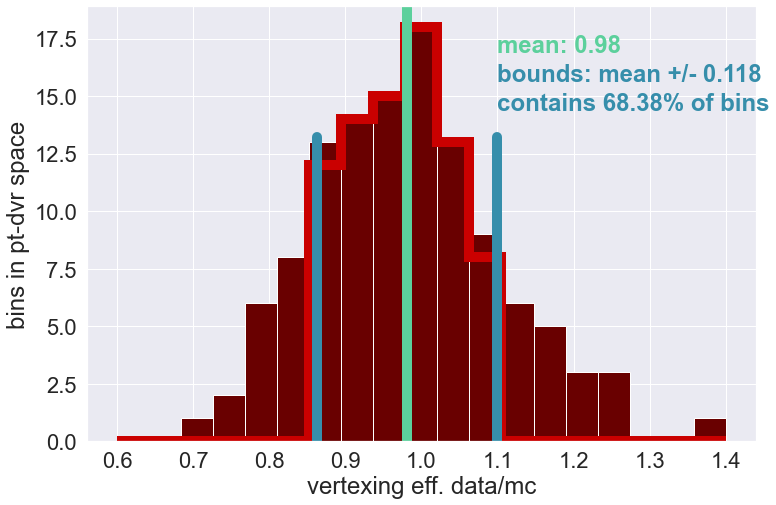

In [37]:

raveled = []
for dv_pt_bin in dv_r_pt_2d_bins[:]:
    # add all bins to the collection except the first bin which is 
    # just the normalizing bin and should always be == 1
    raveled.extend(dv_pt_bin[1:])

raveled = np.array(raveled)
raveled_np = np.array(raveled)
    
offset = .118
# offset = .103
maxx = raveled_np.mean() + offset
minn = raveled_np.mean() - offset


raveled_np = raveled_np[np.where((raveled_np>minn) & (raveled_np<maxx))]
contained = len(raveled_np)/len(raveled)

fig = plt.figure(figsize=[12,8])
nbins = 20
plt.hist(raveled,bins=np.linspace(0.6,1.4,nbins))
plt.hist(raveled_np,bins=np.linspace(0.6,1.4,nbins), histtype="step", linewidth=10)


color1 = "#368eab"
color2 = "#5cd09c"
plt.xlabel('vertexing eff. data/mc')
plt.ylabel('bins in pt-dvr space')
plt.axvline(np.mean(raveled), linewidth=10, color=color2)
plt.axvline(np.mean(raveled)+offset, linewidth=10, color=color1,ymax=0.7)
plt.axvline(np.mean(raveled)-offset, linewidth=10, color=color1,ymax=0.7)

plt.figtext(.6,.8, f"mean: {np.mean(raveled):.2f}", fontweight='bold', color=color2, )  
plt.figtext(.6,.75, f"bounds: mean +/- {offset:.3f}", fontweight='bold', color=color1)
plt.figtext(.6,.7, f"contains {contained*100:.2f}% of bins", fontweight='bold', color=color1)


In [42]:

pt_hist_entries, pt_hist_edges = np.histogram(df_data.secVtx_VSI_LRTR3_1p0_pt, bins=np.linspace(0,100,100))

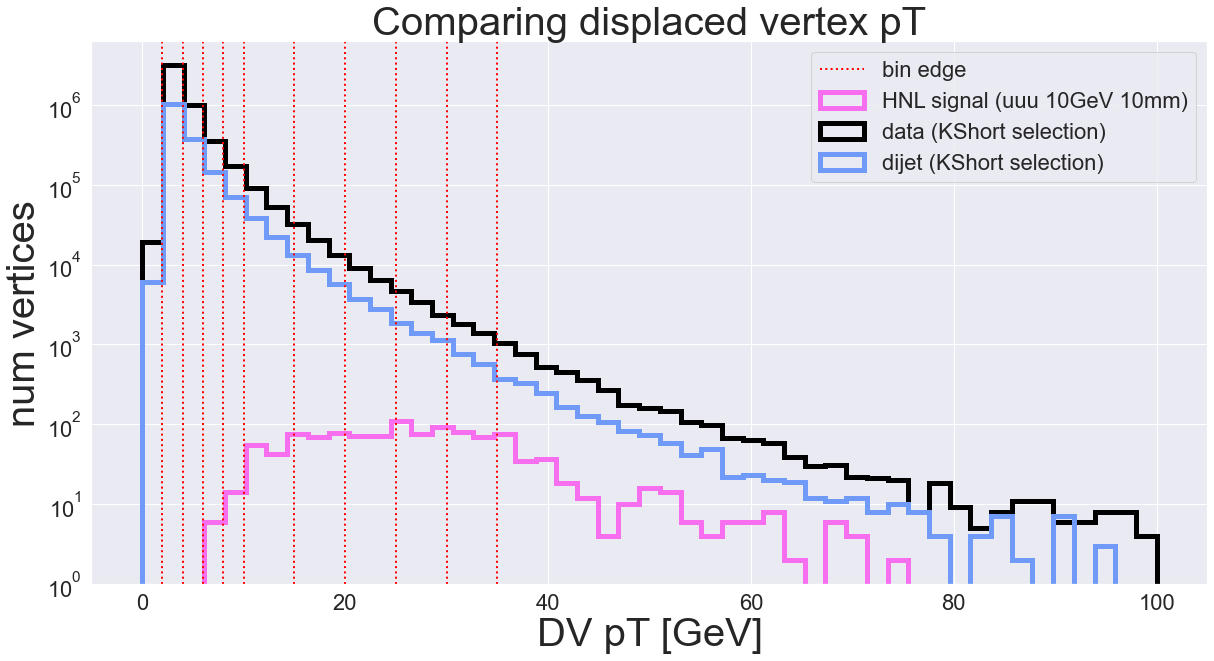

In [54]:
fig = plt.figure(figsize=[20,10])

hist_options = {
    'histtype': 'step',
    'linewidth': 5,
    'density': False,
    'bins': np.linspace(0,100,50),
    'log': True,
}

hnl_tree = uproot.open('/data/hnl/forRobin/VSILepMod_uuu_10G_10mm/histograms_mc16e_10G_10mm_uuu.root')
plt.hist(
    hnl_tree['VSI_LRTR3_1p0_ntuples_LNC_DVtype'].pandas.df('DV_pt')['DV_pt'].append(
    hnl_tree['VSI_LRTR3_1p0_ntuples_LNC_DVtype'].pandas.df('DV_pt')['DV_pt']) , 
    label='HNL signal (uuu 10GeV 10mm)',
    color='#f76fee',
    **hist_options);

plt.hist(
    df_data['secVtx_VSI_LRTR3_1p0_pt'],
    label='data (KShort selection)',
    color='black',
    **hist_options)

plt.hist(
    df['secVtx_VSI_LRTR3_1p0_pt'],
    label='dijet (KShort selection)',
    color='#709af8',
    **hist_options)

for pt_bin in pt_bins:
    plt.axvline(x=pt_bin, linewidth=2, linestyle=':', color='r')
plt.axvline(x=pt_bin, linewidth=2, linestyle=':', color='r', label='bin edge')


plt.xlabel('DV pT [GeV]', fontsize=40)
plt.ylabel('num vertices', fontsize=40)
plt.title('Comparing displaced vertex pT', fontsize=40)
plt.legend();